In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
from scipy import stats
from time import time
import datetime
%matplotlib inline

In [2]:
train_org = pd.read_csv('data/train.csv')
test_org = pd.read_csv('data/test.csv')
store_org = pd.read_csv('data/store.csv')

/root/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 数据清洗

In [7]:
store_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [8]:
store_org.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [16]:
np.where(store_org['CompetitionDistance'].isnull())

(array([290, 621, 878]),)

In [19]:
store_org.iloc[290]

Store                        291
StoreType                      d
Assortment                     a
CompetitionDistance          NaN
CompetitionOpenSinceMonth    NaN
CompetitionOpenSinceYear     NaN
Promo2                         0
Promo2SinceWeek              NaN
Promo2SinceYear              NaN
PromoInterval                NaN
Name: 290, dtype: object

In [21]:
#竞争对手距离为空时，竞争对手开业时间均为空
store_org[store_org['CompetitionDistance'].isnull() & store_org['CompetitionOpenSinceMonth'].isnull() & store_org['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [139]:
store = store_org.copy()

In [140]:
#对为空的competitiondistance用极大值填充，表示竞争对手距离很远
#上述填充方式会导致competitiondistance在做min-max缩放时值太小，不合适，故改为0值填充
store.fillna({'CompetitionDistance':0},inplace=True)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [37]:
#replace函数只能按值替换，不能按行列索引及标签替换
store.replace({'CompetitionOpenSinceMonth':{290:0, 621:0, 878:0},'CompetitionOpenSinceYear':{290:0,621:0,878:0}},inplace=True)

In [141]:
#对CompetitionDistance用0填充的行里面竞争对手开业时间用0填充
store.loc[(290,621,878),('CompetitionOpenSinceMonth','CompetitionOpenSinceYear')]=[[0,0],[0,0],[0,0]]

In [142]:
store.iloc[290]

Store                        291
StoreType                      d
Assortment                     a
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              NaN
Promo2SinceYear              NaN
PromoInterval                NaN
Name: 290, dtype: object

In [143]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    764 non-null float64
CompetitionOpenSinceYear     764 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [144]:
#在competitiondistance不为空的行内，用频数最多的月份填充CompetitionOpenSinceMonth
store.fillna({'CompetitionOpenSinceMonth':9.0},inplace=True)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [145]:
#在competitiondistance不为空的行内，用频数最多的年份填充CompetitionOpenSinceMYear
store.fillna({'CompetitionOpenSinceYear':2013.0},inplace=True)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [146]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [147]:
#promointerval缺失值用0填充
store.fillna({'PromoInterval':0},inplace=True)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,0
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,0
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,0
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,0
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,0
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,0
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,0


In [148]:
store.dropna(axis=1,inplace=True)

In [149]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1115 non-null float64
CompetitionOpenSinceMonth    1115 non-null float64
CompetitionOpenSinceYear     1115 non-null float64
Promo2                       1115 non-null int64
PromoInterval                1115 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 69.8+ KB


In [162]:
store.CompetitionDistance[store['CompetitionDistance']>=20000].count()

57

In [165]:
store.CompetitionDistance[store['CompetitionDistance']>=40000].count()

8

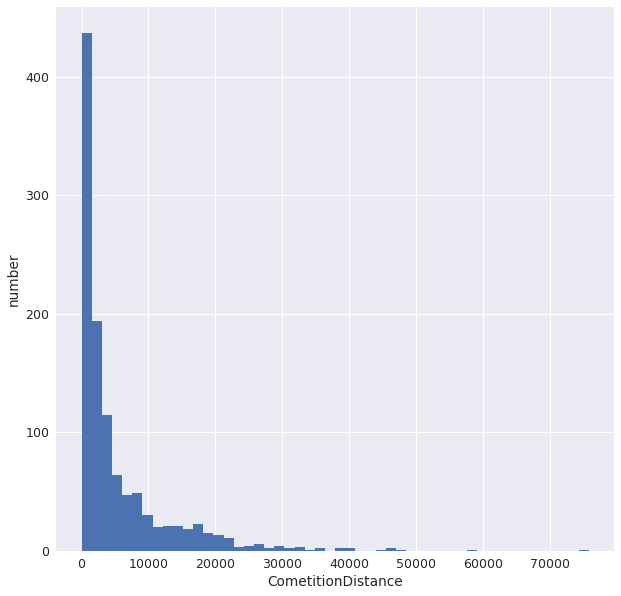

In [166]:
#CompetitionDistance大于40000的，应该就属于异常值了，为了保证缩放效果，将异常值用均值替换
plt.figure(figsize=(10,10))
plt.hist(store['CompetitionDistance'],bins=50)
plt.xlabel('CometitionDistance')
plt.ylabel('number')

In [167]:
np.where(store['CompetitionDistance']>=40000)

(array([109, 121, 452, 461, 523, 725, 746, 800]),)

In [168]:
store['CompetitionDistance'].mean()

5390.358744394619

In [169]:
store.loc[(109, 121, 452, 461, 523, 725, 746, 800),('CompetitionDistance')]=[5390.36]

In [171]:
store.loc[[109, 121, 452, 461, 523, 725, 746, 800]]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval
109,110,a,c,5390.36,4.0,2013.0,0,0
121,122,a,c,5390.36,4.0,2013.0,0,0
452,453,a,c,5390.36,9.0,2013.0,0,0
461,462,a,a,5390.36,8.0,2008.0,0,0
523,524,a,c,5390.36,9.0,2013.0,0,0
725,726,a,c,5390.36,2.0,2002.0,0,0
746,747,c,c,5390.36,8.0,2008.0,0,0
800,801,d,a,5390.36,4.0,2013.0,0,0


In [172]:
#两个非空表关联
train_merge = pd.merge(train_org,store,on='Store',how='outer')

In [173]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
PromoInterval                1017209 non-null object
dtypes: float64(3), int64(8), object(5)
memo

In [174]:
train_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0


In [175]:
corrmat = train_merge.corr()

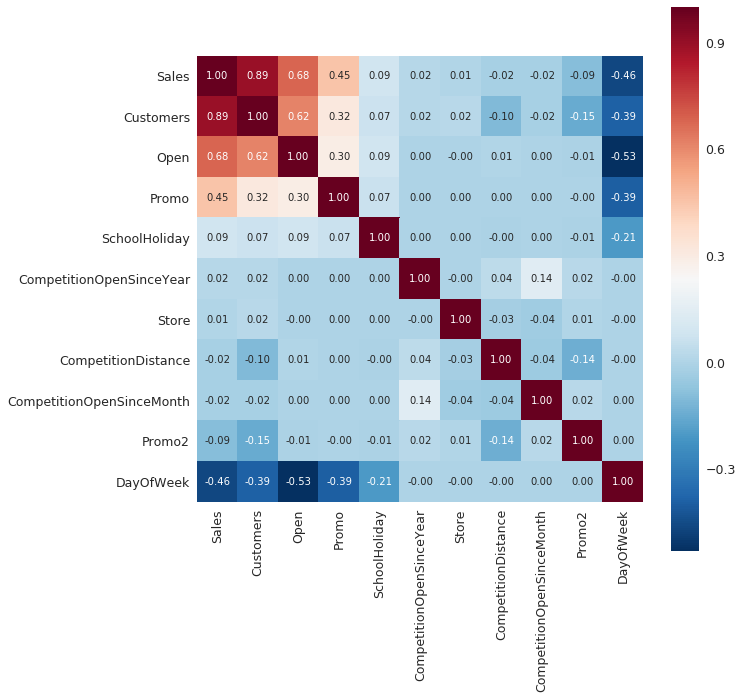

In [154]:
plt.figure(figsize=(10,10))
attitudes=corrmat.nlargest(15,'Sales')['Sales'].index
cm  = np.corrcoef(train_merge[attitudes].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cmap='RdBu_r',cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=attitudes.values,xticklabels=attitudes.values)
plt.show()

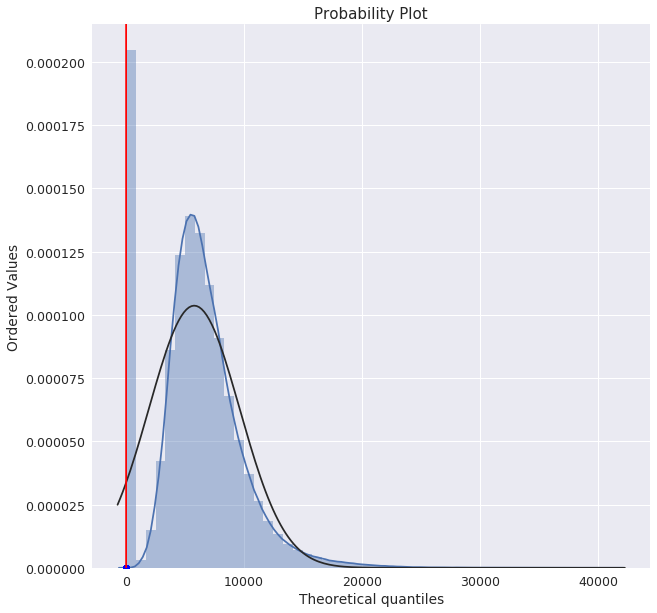

In [176]:
plt.figure(figsize=(10,10))
sns.distplot(train_merge['Sales'],fit=stats.norm)
res = stats.probplot(train_merge['Sales'],plot=plt)

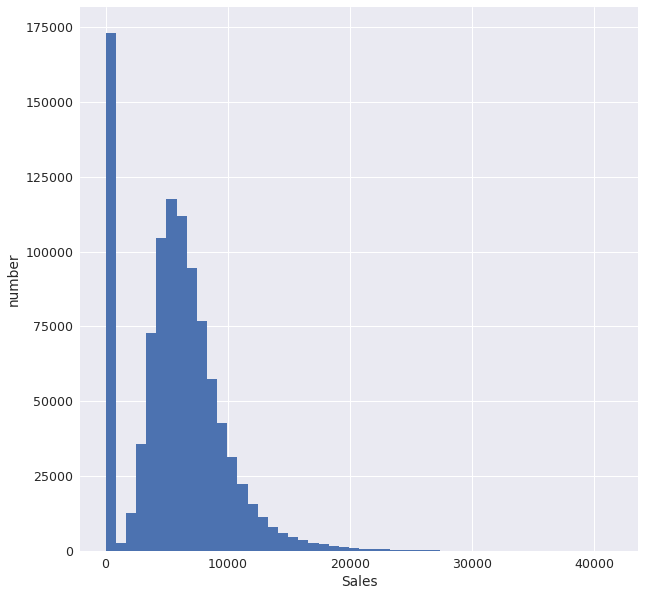

In [177]:
plt.figure(figsize=(10,10))
plt.hist(train_merge['Sales'],bins=50)
plt.xlabel('Sales')
plt.ylabel('number')
#plt.title('sales分布频数直方图')

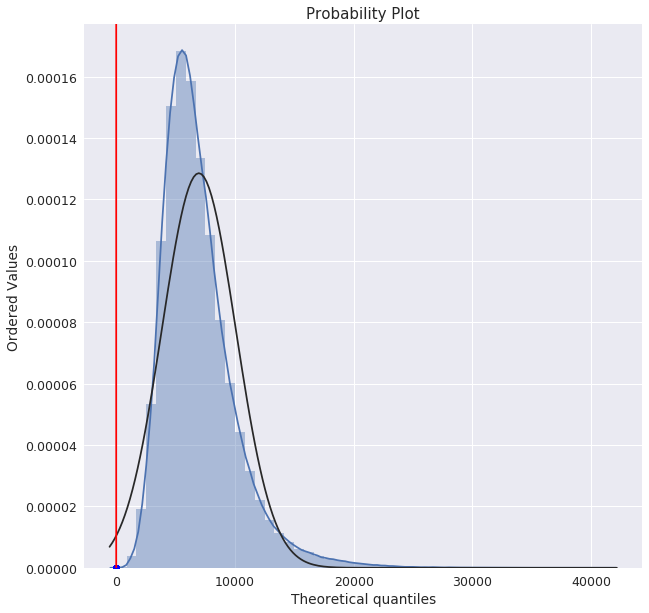

In [178]:
plt.figure(figsize=(10,10))
sns.distplot(train_merge.Sales[train_merge['Sales']!=0],fit=stats.norm)
res = stats.probplot(train_merge['Sales'],plot=plt)

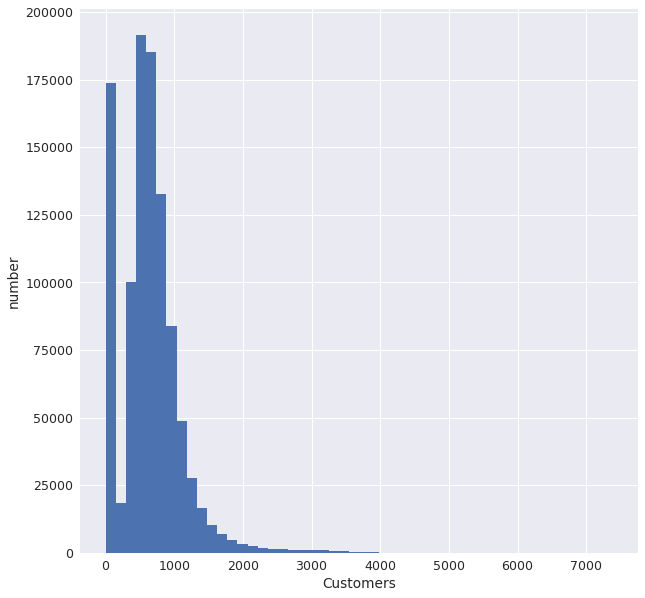

In [179]:
plt.figure(figsize=(10,10))
plt.hist(train_merge['Customers'],bins=50)
plt.xlabel('Customers')
plt.ylabel('number')

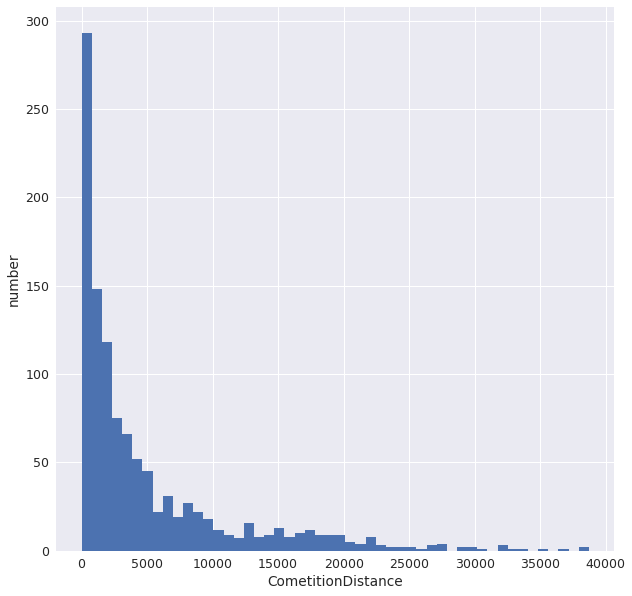

In [180]:
plt.figure(figsize=(10,10))
plt.hist(store['CompetitionDistance'],bins=50)
plt.xlabel('CometitionDistance')
plt.ylabel('number')

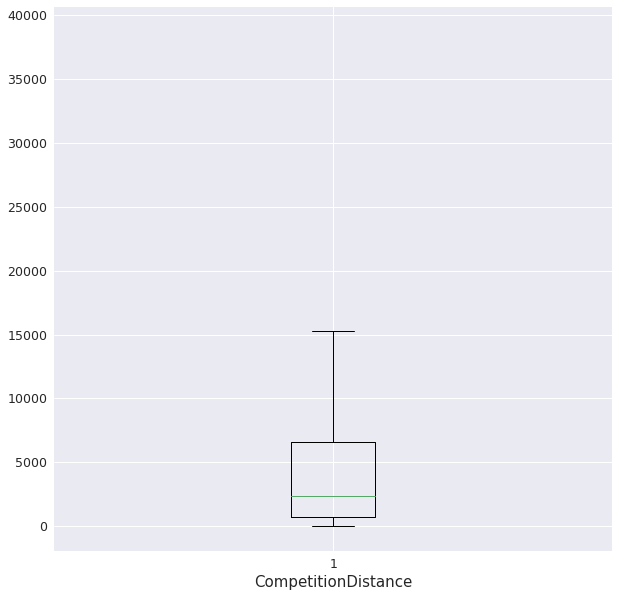

In [181]:
plt.figure(figsize=(10,10))
plt.boxplot(store['CompetitionDistance'])
#plt.ylim(0,80000)
#plt.xlim(0,1115)
plt.xlabel('CompetitionDistance',fontsize=15)

In [182]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
PromoInterval                1017209 non-null object
dtypes: float64(3), int64(8), object(5)
memo

In [183]:
train_merge['StateHoliday'].value_counts().keys()

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

In [184]:
train_merge.StateHoliday[train_merge['StateHoliday']==0]

310        0
311        0
312        0
313        0
314        0
315        0
316        0
317        0
318        0
319        0
320        0
321        0
322        0
323        0
324        0
325        0
326        0
327        0
328        0
329        0
330        0
331        0
332        0
333        0
334        0
335        0
336        0
337        0
338        0
339        0
          ..
1016795    0
1016796    0
1016797    0
1016798    0
1016799    0
1016800    0
1016801    0
1016802    0
1016803    0
1016804    0
1016805    0
1016806    0
1016807    0
1016808    0
1016809    0
1016810    0
1016811    0
1016812    0
1016813    0
1016814    0
1016815    0
1016816    0
1016817    0
1016818    0
1016819    0
1016820    0
1016821    0
1016822    0
1016823    0
1016824    0
Name: StateHoliday, Length: 131072, dtype: object

In [185]:
train_merge['StateHoliday'] = train_merge['StateHoliday'].map(lambda x:str(x))

In [186]:
train_merge['StateHoliday'].value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [188]:
train_merge.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0


In [189]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 16 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
PromoInterval                1017209 non-null object
dtypes: float64(3), int64(8), object(5)
memo

In [190]:
#处理日期数据
train_merge['Year'] = train_merge.Date.apply(lambda x:x.split('-')[0])
train_merge['Year'] = train_merge['Year'].astype(float)
train_merge['Month'] = train_merge.Date.apply(lambda x:x.split('-')[1])
train_merge['Month'] = train_merge['Month'].astype(float)
train_merge['Day'] = train_merge.Date.apply(lambda x:x.split('-')[2])
train_merge['Day'] = train_merge['Day'].astype(float)

In [191]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 19 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
PromoInterval                1017209 non-null object
Year                         1017209 non-nul

In [192]:
train_merge.drop(['Date'],axis=1,inplace = True)

In [193]:
train_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
PromoInterval                1017209 non-null object
Year                         1017209 non-null float64
Month                        1017209 non-nu

In [194]:
train_merge['PromoInterval'].value_counts()

0                   508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: PromoInterval, dtype: int64

In [196]:
#将object数据进行one-hot转换，并将数据类型转换为float型
train =pd.get_dummies(train_merge)

In [197]:
train = train.astype('float')

In [198]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 29 columns):
Store                             1017209 non-null float64
DayOfWeek                         1017209 non-null float64
Sales                             1017209 non-null float64
Customers                         1017209 non-null float64
Open                              1017209 non-null float64
Promo                             1017209 non-null float64
SchoolHoliday                     1017209 non-null float64
CompetitionDistance               1017209 non-null float64
CompetitionOpenSinceMonth         1017209 non-null float64
CompetitionOpenSinceYear          1017209 non-null float64
Promo2                            1017209 non-null float64
Year                              1017209 non-null float64
Month                             1017209 non-null float64
Day                               1017209 non-null float64
StateHoliday_0                    1017209 non-null float64
St

In [199]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1.0,5.0,5263.0,555.0,1.0,1.0,1.0,1270.0,9.0,2008.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,4.0,5020.0,546.0,1.0,1.0,1.0,1270.0,9.0,2008.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,3.0,4782.0,523.0,1.0,1.0,1.0,1270.0,9.0,2008.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,2.0,5011.0,560.0,1.0,1.0,1.0,1270.0,9.0,2008.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,6102.0,612.0,1.0,1.0,1.0,1270.0,9.0,2008.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [200]:
#'Customers','CompetitionDistance'分布偏态太明显，要做对数转换，,二者的取值都比较大，最好在做缩放
from sklearn.preprocessing import MinMaxScaler
label = train['Sales']
features = train.drop('Sales',axis = 1)
numerical = ['Customers','CompetitionDistance']
features[numerical] = train[numerical].apply(lambda x: np.log(x+1))
scaler = MinMaxScaler()
features[numerical] = scaler.fit_transform(train[numerical]) 

In [201]:
features.head()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1.0,5.0,0.075122,1.0,1.0,1.0,0.032808,9.0,2008.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,4.0,0.073904,1.0,1.0,1.0,0.032808,9.0,2008.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,3.0,0.070790,1.0,1.0,1.0,0.032808,9.0,2008.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,2.0,0.075799,1.0,1.0,1.0,0.032808,9.0,2008.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.082837,1.0,1.0,1.0,0.032808,9.0,2008.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [202]:
features.describe()

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,8.569923e-02,8.301067e-01,3.815145e-01,1.786467e-01,1.313621e-01,7.764401e+00,2.004832e+03,5.005638e-01,...,1.556219e-02,1.345250e-01,3.076182e-01,5.283526e-01,8.153683e-03,4.634937e-01,4.994362e-01,1.165896e-01,2.881630e-01,9.581119e-02
std,3.219087e+02,1.997391e+00,6.286028e-02,3.755392e-01,4.857586e-01,3.830564e-01,1.707103e-01,2.806179e+00,1.024459e+02,4.999999e-01,...,1.237741e-01,3.412156e-01,4.615078e-01,4.991957e-01,8.992891e-02,4.986658e-01,4.999999e-01,3.209308e-01,4.529076e-01,2.943323e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,5.481862e-02,1.000000e+00,0.000000e+00,0.000000e+00,1.808318e-02,6.000000e+00,2.008000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,8.243097e-02,1.000000e+00,0.000000e+00,0.000000e+00,5.993283e-02,9.000000e+00,2.012000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,1.132918e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.694653e-01,9.000000e+00,2.013000e+03,1.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.200000e+01,2.015000e+03,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [204]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size = 0.2,random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_val.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 651013 samples.
Validation set has 162754 samples.
Testing set has 203442 samples.


In [207]:
def rmspe(y_pre,y):
    rmspe = np.sqrt(np.mean((y_pre/y - 1)**2))
    return rmspe

In [213]:
def train_perdict(learner,sample_size,X_train,y_train,X_val,y_val):
    results = {}
    #训练模型，并计算训练时间
    start  = time()
    learner = learner.fit(X_train.iloc[:sample_size],y_train[:sample_size])
    end = time()
    results['train_time'] = end - start
    
    #预测模型，并计算预测时间
    start = time()
    predictions_val = learner.predict(X_val)
    end = time()
    results['pred_time'] = end - start
    
    results['rmspe'] = rmspe(predictions_val,y_val)
    
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))
    
    return results

In [214]:
def evaluate(results):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 3, figsize = (11,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'pred_time', 'rmspe']):
            for i in np.arange(4):
                
                # Creative plot code
                ax[j//3, j%3].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
                ax[j//3, j%3].set_xticklabels(["1%", "10%", "100%"])
                ax[j//3, j%3].set_xlabel("Training Set Size")
                ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    # Add unique y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    #ax[0, 1].set_ylabel("Accuracy Score")
    #ax[0, 2].set_ylabel("F-score")
    ax[0, 1].set_ylabel("Time (in seconds)")
    ax[0, 2].set_ylabel("Rmspe Score")
    #ax[1, 2].set_ylabel("F-score")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    #ax[0, 1].set_title("Accuracy Score on Training Subset")
    #ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 1].set_title("Model Predicting")
    ax[0, 2].set_title("Rmspe Score")
    #ax[1, 2].set_title("F-score on Testing Set")
    
    # Add horizontal lines for naive predictors
    #ax[0, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    #ax[1, 1].axhline(y = accuracy, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    #ax[0, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    #ax[1, 2].axhline(y = f1, xmin = -0.1, xmax = 3.0, linewidth = 1, color = 'k', linestyle = 'dashed')
    
    # Set y-limits for score panels
    #ax[0, 1].set_ylim((0, 1))
    #ax[0, 2].set_ylim((0, 1))
    #ax[1, 1].set_ylim((0, 1))
    #ax[1, 2].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches, bbox_to_anchor = (-.80, 2.53), \
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clf_A  = LogisticRegression(random_state=0)
clf_B  = SVC(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)

samples_1 = round(X_train.shape[0]*0.01)
samples_10 = round(X_train.shape[0]*0.1)
samples_50 = round(X_train.shape[0]*0.5)
samples_100= round(X_train.shape[0])

results = {}
for clf in [clf_A,clf_B,clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1,samples_10,samples_50,samples_100]):
        results[clf_name][i] = train_perdict(clf,samples,X_train,y_train,X_val,y_val)

evaluate(results)

MemoryError: 